# MNIST

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train , y_train) ,(X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 6s 1us/step


In [6]:
X_train.shape

(60000, 28, 28)

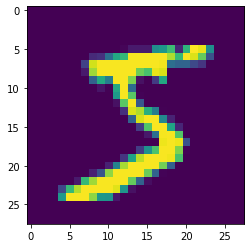

In [13]:
plt.imshow(X_train[0])

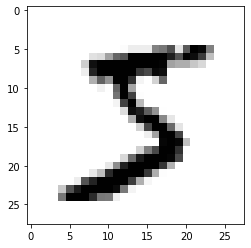

In [14]:
plt.imshow(X_train[0], cmap = plt.cm.binary)  #our conversion

In [15]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Normalizing the data (Preprocessing)

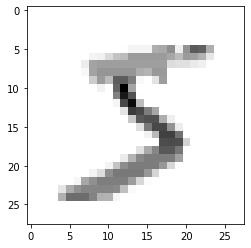

In [16]:
X_train = tf.keras.utils.normalize(X_train)
X_test = tf.keras.utils.normalize(X_test)
plt.imshow(X_train[0] , cmap = plt.cm.binary)

In [17]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [18]:
print(y_train[0])

5


### Resizing to make it suitable for Convolution 

In [21]:
IMG_SIZE = 28
X_trainr = np.array(X_train).reshape(-1 , IMG_SIZE, IMG_SIZE , 1) #increasing one dimension for kernel operation
X_testr = np.array(X_test).reshape(-1 , IMG_SIZE, IMG_SIZE , 1) 
X_trainr.shape

(60000, 28, 28, 1)

### Building a proper Neutral Network 

In [28]:
cnn = tf.keras.models.Sequential()

#CNN - 1st layer
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size =3, activation='relu',input_shape = X_trainr.shape[1:]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size =2,strides = 2))

#CNN - 2nd layer
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size =3, activation='relu',input_shape = X_trainr.shape[1:]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size =2,strides = 2))


cnn.add(tf.keras.layers.Flatten())

#Full Connection Layer
cnn.add(tf.keras.layers.Dense(units=64, activation = 'relu'))

#Output layer
cnn.add(tf.keras.layers.Dense(units=10,activation = 'softmax'))

In [29]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [30]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [26]:
cnn.fit(X_trainr , y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1416 - accuracy: 0.9563
Epoch 2/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0476 - accuracy: 0.9851
Epoch 3/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0330 - accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0230 - accuracy: 0.9930
Epoch 5/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0181 - accuracy: 0.9943


In [31]:
cnn.fit(X_trainr , y_train , epochs = 5,validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 37s 28ms/step - loss: 0.1933 - accuracy: 0.9410 - val_loss: 0.0725 - val_accuracy: 0.9772
Epoch 2/5
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0603 - accuracy: 0.9819 - val_loss: 0.0632 - val_accuracy: 0.9805
Epoch 3/5
1313/1313 [==============================] - 45s 34ms/step - loss: 0.0405 - accuracy: 0.9871 - val_loss: 0.0573 - val_accuracy: 0.9836
Epoch 4/5
1313/1313 [==============================] - 39s 30ms/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0489 - val_accuracy: 0.9863
Epoch 5/5
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0233 - accuracy: 0.9923 - val_loss: 0.0537 - val_accuracy: 0.9846


In [34]:
# Accuracy

test_loss, test_accuracy = cnn.evaluate(X_testr, y_test)
print(f"Test Loss : {test_loss}")
print(f"Accuracy: {test_accuracy}")

313/313 [==============================] - 2s 6ms/step - loss: 0.0400 - accuracy: 0.9884
Test Loss : 0.040040284395217896
Accuracy: 0.9883999824523926
